# Metal Default Recognition Using Deep Learning Approch

A metal factory desires to improve its quality process with cameras on it’s assembly
chain.


Build a machine learning model which is able to identify metal output containing
defaults.


You can choose any classification model, choose to subsample the dataset, or any
hyperparameters as long as you explain your choice.


Dataset description


● 1 000 images of metal without defaults


● 100 images of metal with defaults


Bonus (optional)
Identify the position of the defaults in the images (i.e draw a box around defaults)

*Language*    : Python 


*Framework*   : Keras


*Environment* :Jupyter Notebook

# Exemple of images that what are working with 

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings
warnings.filterwarnings("ignore")

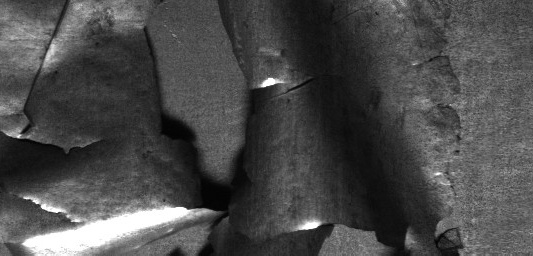

In [2]:
image.load_img('C:\\Users\\mesda\\Desktop\\training set\\train_data_with_default\\000f95222c.jpg')

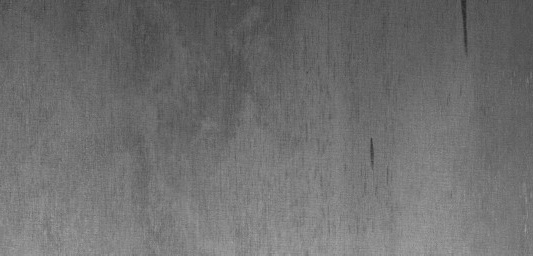

In [4]:
image.load_img('C:\\Users\\mesda\\Desktop\\training set\\train_data_without_default\\000031f466.jpg')

let's take a look at our image 

In [6]:
image = plt.imread('C:\\Users\\mesda\\Desktop\\training set\\train_data_without_default\\000031f466.jpg')
print("Shape of our images ", image.shape)

Shape of our images  (256, 533, 3)


# Preprocessing our images 

One of the most important tasks in machine learning is how you preprocess the date to be well fitted to your model.

if we took a look to our data we can simply conclude that there's some images where the metal deformed only in a certain place or the image are half black which can be a big problem for our nueral network model.

As a solution we are going to create a function that snip the images to get rid all the part that doesnt give us inforamtion about the data.

### So Let build our new dataset.

In [192]:
import os
import cv2

os.chdir("C:\\Users\\Supernova\\Desktop\\train_data_with_default\\left") 
list_metal_with_default_left = os.listdir("C:\\Users\\Supernova\\Desktop\\train_data_with_default\\left")

os.chdir("C:\\Users\\Supernova\\Desktop\\train_data_with_default\\right") 
list_metal_with_default_right = os.listdir("C:\\Users\\Supernova\\Desktop\\train_data_with_default\\right")

os.chdir("C:\\Users\\Supernova\\Desktop\\train_data_with_default\\center") 
list_metal_with_default_center = os.listdir("C:\\Users\\Supernova\\Desktop\\train_data_with_default\\center")

os.chdir("C:\\Users\\Supernova\\Desktop\\train_data_without_default") 
list_metal_without_default = os.listdir("C:\\Users\\Supernova\\Desktop\\train_data_without_default")

In [193]:
print(" shape of the list metal with default left ones",len(list_metal_with_default_left))
print(" shape of the list metal with default right ones",len(list_metal_with_default_right))
print(" shape of the list metal with default centered ones",len(list_metal_with_default_center))
print(" shape of the list metal without default",len(list_metal_without_default))

 shape of the list metal with default left ones 64
 shape of the list metal with default right ones 61
 shape of the list metal with default centered ones 91
 shape of the list metal without default 1000


In [194]:
def convert_images(liste, path, dimension):
    for i,elm in enumerate(liste):
        image = cv2.imread(path+elm)
        img = image[dimension[0][0]:dimension[0][1],dimension[1][0]:dimension[1][1]]
        cv2.imwrite(str(i)+str(elm), img)
        pass
    pass
pass

In [195]:
os.chdir("C:\\Users\\Supernova\\Desktop\\train_data_without_default_formated")

In [196]:
convert_images(list_metal_without_default,"C:\\Users\\Supernova\\Desktop\\train_data_without_default\\", [(0,256), (533,1066)])

In [197]:
os.chdir("C:\\Users\\Supernova\\Desktop\\train_data_with_default_formated")

In [198]:
convert_images(list_metal_with_default_left, "C:\\Users\\Supernova\\Desktop\\train_data_with_default\\left\\",[(0,256), (0,533)])
convert_images(list_metal_with_default_right, "C:\\Users\\Supernova\\Desktop\\train_data_with_default\\right\\",[(0,256), (1066,1600)])
convert_images(list_metal_with_default_center, "C:\\Users\\Supernova\\Desktop\\train_data_with_default\\center\\",[(0,256), (533,1066)])

# Building our Neural Network 

As we are working with images, convolutional neural network stays the efficient neural network to process our image and give as an accurate resulat 

In [6]:
class Neural(Sequential):
    # Initialising the CNN
    def __init__(self,input_nodes, hidden_nodes, output_nodes, activation_function = 'sigmoid', 
                 Optimizer = 'adam', Loss = 'binary_crossentropy'):
        Sequential.__init__(self)
        # Step1 - Convolution
        self.add(Convolution2D(input_nodes, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))

        # Step2 - Pooling
        self.add(MaxPooling2D(pool_size = (2,2)))

        # Adding a second convolution layer
        self.add(Convolution2D(input_nodes, 3, 3, activation = 'relu'))
        self.add(MaxPooling2D(pool_size = (2,2)))

        # step3 - Flattening
        self.add(Flatten())

        # Step4 - Full COnnection
        self.add(Dense(hidden_nodes, activation = 'relu'))
        self.add(Dense(output_nodes, activation = activation_function))
        # Compiling the CNN
        self.compile(optimizer = Optimizer, loss= Loss, metrics=['accuracy'])
        self.p = None
        self.training_set = None
        self.test_set = None
        pass
    
    def Generator(self, train_path, test_path):
        train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

        test_datagen = ImageDataGenerator(rescale=1./255)
        
        self.training_set = train_datagen.flow_from_directory(
                train_path,
                target_size=(128, 128),
                batch_size=32,
                class_mode='binary')

        self.test_set = test_datagen.flow_from_directory(
                test_path,
                target_size=(128, 128),
                batch_size=32,
                class_mode='binary')
        print(self.training_set.class_indices)
        return self.training_set, self.test_set
    
    def Fit(self, train_set, test_set, epochs):
        self.p = self.fit_generator(
                self.training_set,
                steps_per_epoch=20,
                nb_epoch=epochs,
                validation_data=self.test_set,
                nb_val_samples=20)
        pass
    def Predict(self, image_path):
        img   = image.load_img(image_path, target_size = (128, 128))
        array = image.img_to_array(img)
        test_img = np.expand_dims(array, axis = 0)
        return self.predict(test_img)
    
    def plotting(self):
        Evolution = plt.figure("Evolution")
        ax = Evolution.add_subplot(1, 1, 1)
        for i,elm in enumerate(['val_loss', 'val_accuracy', 'accuracy']):
            ax.plot(self.p.history[elm])
            ax.set_xlabel('Epochs')
            ax.set_ylabel(elm)
            ax.grid(True, linestyle = '-')
            ax.legend(['val_loss', 'val_accuracy', 'accuracy'])
        pass
    pass
pass

In [7]:
cnn = Neural(128, 256, 1)

In [9]:
x_train, y_train = cnn.Generator("C:\\Users\\mesda\\Desktop\\training set","C:\\Users\\mesda\\Desktop\\testing set")

Found 336 images belonging to 2 classes.
Found 86 images belonging to 2 classes.
{'train_data_with_default': 0, 'train_data_without_default': 1}


As we can see there's two classes in our data metal with default and metal without defalut. Also i used 50 % for testing and 50 % for training

As we can remark easly the size of our date is not so huge for that we can increase the number of the epochs to get an accurate resultat

In [10]:
cnn.Fit(x_train ,y_train ,4)


Epoch 1/4
20/20 [==============================] - 67s 3s/step - loss: 1.4503 - accuracy: 0.5033 - val_loss: 0.5788 - val_accuracy: 0.6414
Epoch 2/4
20/20 [==============================] - 69s 3s/step - loss: 0.6323 - accuracy: 0.6458 - val_loss: 0.5405 - val_accuracy: 0.7018
Epoch 3/4
20/20 [==============================] - 65s 3s/step - loss: 0.5197 - accuracy: 0.8158 - val_loss: 0.5415 - val_accuracy: 0.7509
Epoch 4/4
20/20 [==============================] - 68s 3s/step - loss: 0.4353 - accuracy: 0.8158 - val_loss: 0.2958 - val_accuracy: 0.7621


A quick test to know if our neural network give us a accurat resualt or not 

In [11]:
from keras.preprocessing.image import ImageDataGenerator, image

In [12]:
res1 = cnn.Predict('C:\\Users\\mesda\\Desktop\\training set\\train_data_with_default\\000f95222c.jpg')
res2 = cnn.Predict('C:\\Users\\mesda\\Desktop\\training set\\train_data_without_default\\000031f466.jpg')

In [13]:
if res1[0][0] == 0:
    print('meta with default')
else:
    print('metal without default')

meta with default


In [14]:
if res2[0][0] == 0:
    print('meta with default')
else:
    print('metal without default')

metal without default


This graph will help us to know more about the process of training and correcting the weight of the neural network 

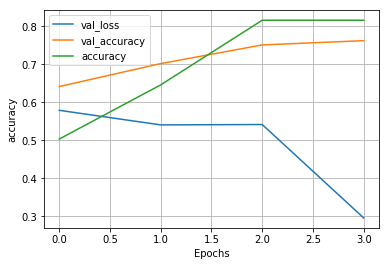

In [15]:
cnn.plotting()